In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import arviz as az
import seaborn as sns
import pymc as pm

In [2]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")

In [3]:
mu = 175
sigma = 7
n = 30
n_samples = 1000

samples = np.stack([np.random.normal(loc=mu, scale=sigma, size=n) for i in range(n_samples)])
samples.shape

(1000, 30)

In [4]:
print(samples[1, :])

[168.7521154  164.76507718 186.03932551 174.89753671 178.53547098
 166.43685324 173.18819275 186.53346854 179.53087581 174.0064583
 173.43909077 181.59265851 166.69050785 183.22433398 166.07866923
 179.2748938  174.15087319 163.67224744 172.59808326 173.62163039
 180.52986468 180.90518979 179.45970115 174.65367383 177.21907685
 176.15960156 164.09910426 168.77703185 181.18799765 177.50704723]


In [5]:
xbar = samples.mean(axis=1)
print(xbar[0:10])

[174.45599554 174.91755506 175.71293812 175.38317558 174.45200455
 176.01775635 174.26451759 174.46718845 173.56806964 176.48997266]


In [6]:
alpha = 0.05
t = st.t.ppf(1 - alpha/2, n-1)
t

2.0452296421327034

In [7]:
interval_width = t * samples.std(axis=1, ddof=1) / np.sqrt(n)
CI_low = samples.mean(axis=1) - interval_width
CI_high = samples.mean(axis=1) + interval_width

In [8]:
coverage_p = np.sum(np.logical_and(CI_low < mu, mu < CI_high)) / samples.shape[0]
coverage_p

0.948

In [9]:
sample_size = 20
mu = 50
sigma = 10
sample_data = np.random.normal(loc=mu, scale=sigma, size=n)
print(sample_data)

[49.22619769 39.08332511 50.46336829 59.64364434 42.1208818  59.11616667
 45.01546315 51.27884059 45.29073121 35.97836943 70.36405132 46.09204578
 41.60739894 57.88606025 42.24685608 51.78685494 40.10262166 70.92604727
 61.95807019 38.92208468 39.3622049  59.26910583 44.04405871 48.06085547
 38.44794398 63.4501465  48.13092255 52.76413903 53.29361187 53.08021373]


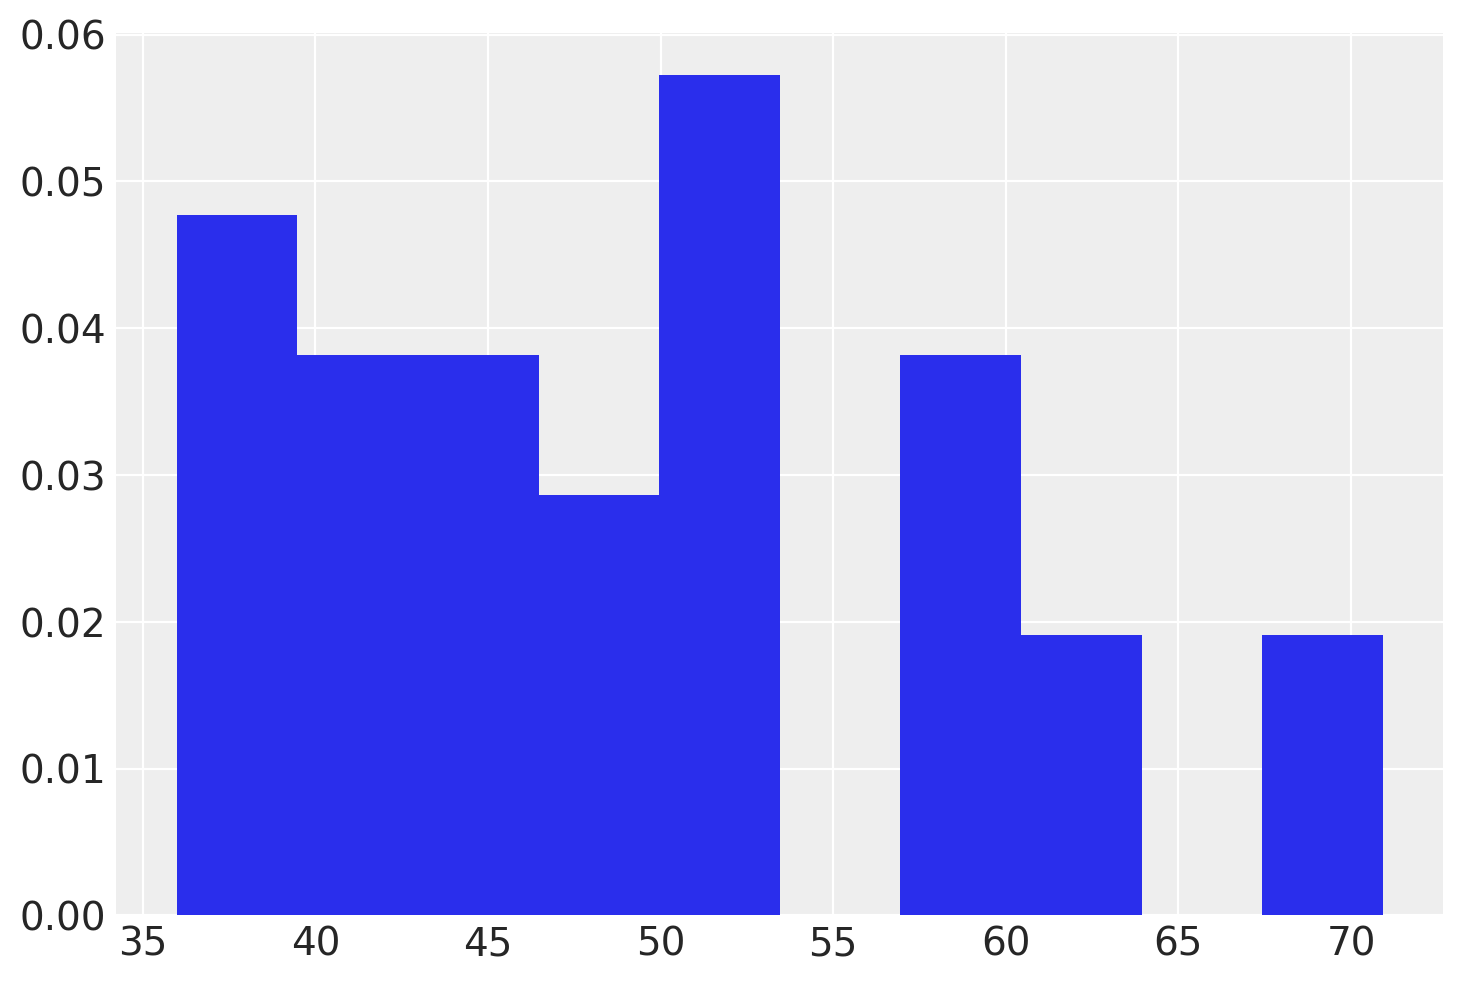

In [10]:
_ = plt.hist(sample_data, density=True)

In [11]:
sample_mean = np.mean(sample_data)
sample_mean

49.96707606604516

In [12]:
sample_stddev = np.std(sample_data, ddof=1)
sample_stddev

9.495937723033265

In [13]:
standard_error = sample_stddev / np.sqrt(sample_size)
print(standard_error)

2.123356225880695


In [14]:
degrees_of_freedom = sample_size - 1
t_val = st.t.ppf(0.975, degrees_of_freedom)
print(t_val)

2.093024054408263


In [15]:
margin_of_error = t_val * standard_error
print(margin_of_error)

4.444235656845839


In [16]:
confidence_interval_lower = sample_mean - margin_of_error
confidence_interval_upper = sample_mean + margin_of_error
confidence_interval = [confidence_interval_lower, confidence_interval_upper]
print(confidence_interval)

[45.52284040919932, 54.411311722891]


In [17]:
def visualize_output(sample_data, sample_mean, interval, type_interval):
    plt.hist(sample_data, density=True, alpha=0.5)
    plt.axvline(x=sample_mean, linestyle='dashed', linewidth=2)
    plt.axvline(x=interval[0], linewidth=2)
    plt.axvline(x=interval[1], linewidth=2)
    plt.legend(['Sample Mean', f'{type_interval} interval'])

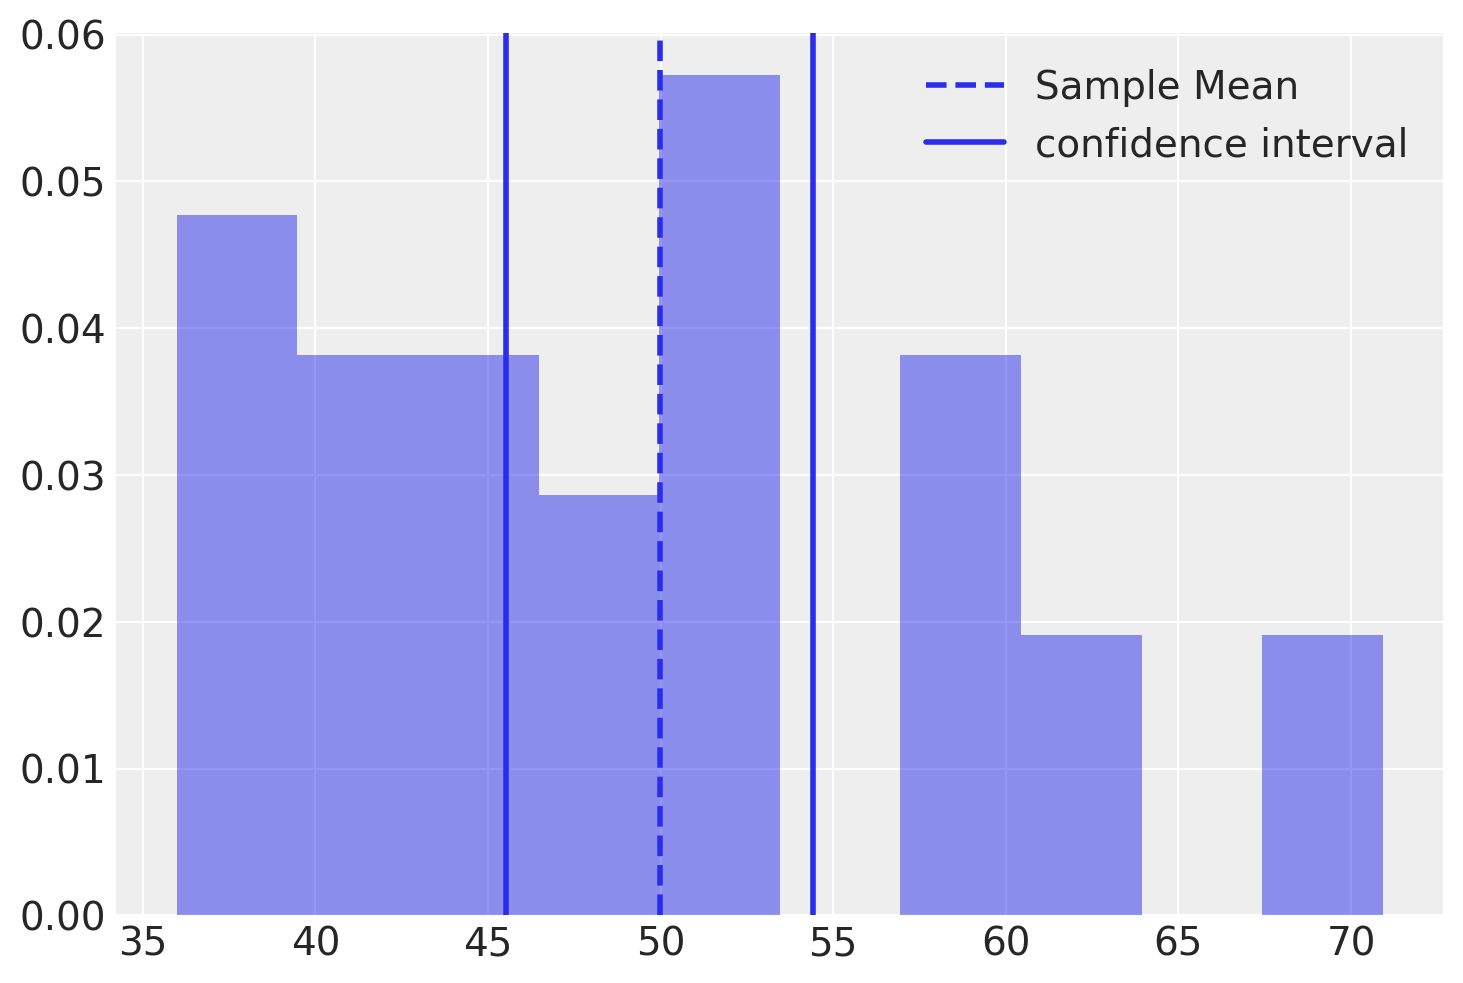

In [18]:
visualize_output(sample_data, sample_mean, confidence_interval, 'confidence')

In [19]:
model = pm.Model()

with model:
    mu = pm.Normal("mu", mu=0, sigma=200)
    sigma = pm.HalfNormal("sigma", 100)
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=sample_data)

In [20]:
with model:
    idata = pm.sample(nuts_sampler="numpyro")

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

In [21]:
az.summary(idata, hdi_prob=0.95, round_to=2)

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,49.91,1.84,46.31,53.47,0.04,0.03,2611.23,2270.39,1.0
sigma,9.97,1.39,7.45,12.71,0.03,0.02,2771.77,2240.99,1.0


In [22]:
%load_ext watermark
%watermark -n -u -v -iv -w -m

Last updated: Sun Jun 16 2024

Python implementation: CPython
Python version       : 3.12.3
IPython version      : 8.25.0

Compiler    : Clang 16.0.6 
OS          : Darwin
Release     : 23.4.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit

pandas    : 2.2.2
pymc      : 5.15.1
numpy     : 1.26.4
matplotlib: 3.8.4
scipy     : 1.13.1
seaborn   : 0.13.2
arviz     : 0.18.0

Watermark: 2.4.3

